In [1]:
import sys
sys.path.append('..')
from MPRA_predict.utils import *

In [2]:
Gosai_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_len200.csv')
Gosai_df

,ID,chr,HepG2,K562,SK-N-SH,seq,pos,ref,alt,allele
0,chr1:14677:G:A:A,chr1,0.416,0.515,0.419,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,14677,G,A,A
1,chr1:14677:G:A:R,chr1,0.668,-0.742,0.516,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,14677,G,A,R
2,chr1:63697:T:C:A,chr1,1.149,-0.735,0.209,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,63697,T,C,A
3,chr1:63697:T:C:R,chr1,1.279,-0.460,0.755,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,63697,T,C,R
4,chr1:64764:C:T:R,chr1,-0.238,-0.056,0.518,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,64764,C,T,R
...,...,...,...,...,...,...,...,...,...,...
763679,chrY:15815629:NA:NA:None,chrY,1.845,1.381,1.702,CTGCATCTGTGCAGCCTGGCAGCGGCGGCGCTGCGCTGTGACATTT...,15815629,NaN,NaN,NaN
763680,chrY:21740684:NA:NA:None,chrY,-0.108,-0.307,-0.080,GCACTTCACATTTGTTTTTAGGGTTACATAGTCTACTCTGTATCCT...,21740684,NaN,NaN,NaN
763681,chrY:21740884:NA:NA:None,chrY,0.260,0.364,0.060,TGTTCAAGTGGCCACAGGGTTACTTGCTTTAGCATGGCTCCTTGGC...,21740884,NaN,NaN,NaN
763682,chrY:21741084:NA:NA:None,chrY,0.377,0.395,-0.031,TAATTAGTTGGGAAGGTTCAGGTTCTGGGACATCCGTTGCTATTTC...,21741084,NaN,NaN,NaN


In [4]:
Siraj_df = pd.read_csv('../data/Siraj_MPRA/Siraj_MPRA_562654.tsv', sep='\t')
Siraj_df

,description,seq,A549,HepG2,K562,SK-N-SH,HCT116,allele,chr,pos,ref,alt,start,end,585605_index
0,chr1:14677:G:A,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.668,-0.704,0.539,0.159,ref,chr1,14677,G,A,14577,14777,0
1,chr1:14677:G:A,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.416,0.554,0.442,-0.288,alt,chr1,14677,G,A,14577,14777,1
2,chr1:63697:T:C,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.270,-0.391,0.752,1.100,ref,chr1,63697,T,C,63597,63797,2
3,chr1:63697:T:C,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.152,-0.659,0.205,1.051,alt,chr1,63697,T,C,63597,63797,3
4,chr1:64764:C:T,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,-0.211,-0.007,0.499,0.258,ref,chr1,64764,C,T,64664,64864,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562649,chrX:155233098:T:C,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,NaN,0.616,1.927,0.798,1.035,alt,chrX,155233098,T,C,155232998,155233198,585600
562650,chrX:155233794:A:G,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,1.410,0.556,2.843,1.496,ref,chrX,155233794,A,G,155233694,155233894,585601
562651,chrX:155233794:A:G,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,0.895,-0.073,1.974,0.795,alt,chrX,155233794,A,G,155233694,155233894,585602
562652,chrX:155234730:T:C,TGGTGAGTTGCTTCTGTGCACACACTTTTGTTTATGAGTGTGCATG...,NaN,0.312,0.166,-0.041,0.444,ref,chrX,155234730,T,C,155234630,155234830,585603


In [ ]:
# Siraj_df['ID'] = Siraj_df[['description', 'allele']].astype(str).agg(':'.join, axis=1)
# Siraj_df

,description,seq,A549,HepG2,K562,SK-N-SH,HCT116,is_ref,chr,pos,ref,alt,start,end,585605_index,allele,ID
0,chr1:14677:G:A,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.668,-0.704,0.539,0.159,True,chr1,14677,G,A,14577,14777,0,R,chr1:14677:G:A:R
1,chr1:14677:G:A,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.416,0.554,0.442,-0.288,False,chr1,14677,G,A,14577,14777,1,A,chr1:14677:G:A:A
2,chr1:63697:T:C,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.270,-0.391,0.752,1.100,True,chr1,63697,T,C,63597,63797,2,R,chr1:63697:T:C:R
3,chr1:63697:T:C,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.152,-0.659,0.205,1.051,False,chr1,63697,T,C,63597,63797,3,A,chr1:63697:T:C:A
4,chr1:64764:C:T,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,-0.211,-0.007,0.499,0.258,True,chr1,64764,C,T,64664,64864,4,R,chr1:64764:C:T:R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562649,chrX:155233098:T:C,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,NaN,0.616,1.927,0.798,1.035,False,chrX,155233098,T,C,155232998,155233198,585600,A,chrX:155233098:T:C:A
562650,chrX:155233794:A:G,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,1.410,0.556,2.843,1.496,True,chrX,155233794,A,G,155233694,155233894,585601,R,chrX:155233794:A:G:R
562651,chrX:155233794:A:G,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,0.895,-0.073,1.974,0.795,False,chrX,155233794,A,G,155233694,155233894,585602,A,chrX:155233794:A:G:A
562652,chrX:155234730:T:C,TGGTGAGTTGCTTCTGTGCACACACTTTTGTTTATGAGTGTGCATG...,NaN,0.312,0.166,-0.041,0.444,True,chrX,155234730,T,C,155234630,155234830,585603,R,chrX:155234730:T:C:R


In [5]:
# Siraj_df = Siraj_df[['ID', 'K562', 'HepG2', 'SK-N-SH', 'A549', 'HCT116']]
merged_df = pd.merge(Gosai_df, Siraj_df, on='seq', how='left')
merged_df

,ID,chr_x,HepG2_x,K562_x,SK-N-SH_x,seq,pos_x,ref_x,alt_x,allele_x,description,A549,HepG2_y,K562_y,SK-N-SH_y,HCT116,allele_y,chr_y,pos_y,ref_y,alt_y,start,end,585605_index
0,chr1:14677:G:A:A,chr1,0.416,0.515,0.419,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,14677,G,A,A,chr1:14677:G:A,NaN,0.416,0.554,0.442,-0.288,alt,chr1,14677.000,G,A,14577.000,14777.000,1.000
1,chr1:14677:G:A:R,chr1,0.668,-0.742,0.516,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,14677,G,A,R,chr1:14677:G:A,NaN,0.668,-0.704,0.539,0.159,ref,chr1,14677.000,G,A,14577.000,14777.000,0.000
2,chr1:63697:T:C:A,chr1,1.149,-0.735,0.209,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,63697,T,C,A,chr1:63697:T:C,NaN,1.152,-0.659,0.205,1.051,alt,chr1,63697.000,T,C,63597.000,63797.000,3.000
3,chr1:63697:T:C:R,chr1,1.279,-0.460,0.755,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,63697,T,C,R,chr1:63697:T:C,NaN,1.270,-0.391,0.752,1.100,ref,chr1,63697.000,T,C,63597.000,63797.000,2.000
4,chr1:64764:C:T:R,chr1,-0.238,-0.056,0.518,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,64764,C,T,R,chr1:64764:C:T,NaN,-0.211,-0.007,0.499,0.258,ref,chr1,64764.000,C,T,64664.000,64864.000,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763690,chrY:15815629:NA:NA:None,chrY,1.845,1.381,1.702,CTGCATCTGTGCAGCCTGGCAGCGGCGGCGCTGCGCTGTGACATTT...,15815629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
763691,chrY:21740684:NA:NA:None,chrY,-0.108,-0.307,-0.080,GCACTTCACATTTGTTTTTAGGGTTACATAGTCTACTCTGTATCCT...,21740684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
763692,chrY:21740884:NA:NA:None,chrY,0.260,0.364,0.060,TGTTCAAGTGGCCACAGGGTTACTTGCTTTAGCATGGCTCCTTGGC...,21740884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
763693,chrY:21741084:NA:NA:None,chrY,0.377,0.395,-0.031,TAATTAGTTGGGAAGGTTCAGGTTCTGGGACATCCGTTGCTATTTC...,21741084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(0.9971235273824237, 0.0)


<Axes: xlabel='K562_x', ylabel='K562_y'>

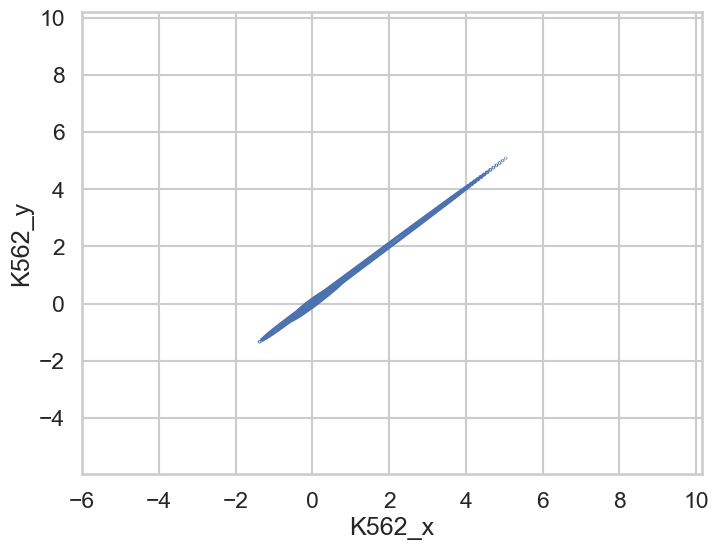

In [7]:
x = merged_df['K562_x']
y = merged_df['K562_y']
print(pearson(x, y))
sns.kdeplot(x=x, y=y)
# sns.scatterplot(x=x, y=y, s=1)

# x = merged_df['K562_x']
# y = merged_df['K562_y']
# print(pearson(x, y))
# # sns.scatterplot(x=x, y=y, s=1)

# x = merged_df['SK-N-SH_x']
# y = merged_df['SK-N-SH_y']
# print(pearson(x, y))
# # sns.scatterplot(x=x, y=y, s=1)

In [8]:
merged_df = merged_df.rename(columns={
    'HepG2_x': 'HepG2',
    'K562_x': 'K562',
    'SK-N-SH_x': 'SK-N-SH',
})
merged_df = merged_df[['ID', 'chr', 'pos', 'ref', 'alt', 'allele', 'K562', 'HepG2', 'SK-N-SH', 'A549', 'HCT116', 'seq']]
merged_df.to_csv('../data/Gosai_MPRA/Gosai_Siraj_MPRA.csv', index=False)